In [221]:
import pandas as pd
import census

ModuleNotFoundError: No module named 'census'

In [131]:
df = pd.read_csv('Citywide_Mobility_Survey_2022.csv')
df

,hh_id,num_trips,person_id,person_num,day_id,travel_dow,day_num,is_complete,travel_date,summary_complete,...,no_travel_6,no_travel_7,no_travel_8,no_travel_9,no_travel_11,no_travel_12,no_travel_13,no_travel_99,wkday_weight,svnday_weight
0,22012096,0,2201209601,1,220120960105,7,5,0,10/09/2022,1,...,0,0,0,0,0,0,0,0,0.000000,0.000000
1,22012096,0,2201209601,1,220120960106,1,6,0,10/10/2022,1,...,0,0,0,0,0,0,0,0,0.000000,0.000000
2,22000050,0,2200005001,1,220000500101,4,1,0,10/13/2022,1,...,995,995,995,995,995,995,995,995,0.000000,0.000000
3,22000050,2,2200005001,1,220000500102,5,2,1,10/14/2022,1,...,995,995,995,995,995,995,995,995,0.000000,215.724068
4,22000050,0,2200005001,1,220000500103,6,3,1,10/15/2022,1,...,0,0,0,0,0,0,0,0,0.000000,215.724068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,22145725,3,2214572501,1,221457250104,5,4,1,10/21/2022,1,...,995,995,995,995,995,995,995,995,0.000000,288.523035
15922,22145725,0,2214572501,1,221457250105,6,5,1,10/22/2022,1,...,0,0,0,0,0,0,0,0,0.000000,288.523035
15923,22145725,0,2214572501,1,221457250106,7,6,1,10/23/2022,1,...,0,0,0,0,0,0,0,0,0.000000,288.523035
15924,22145725,8,2214572501,1,221457250107,1,7,1,10/24/2022,1,...,995,995,995,995,995,995,995,995,504.915312,288.523035


In [132]:
selected_df = df[['delivery_2', 'delivery_4', 'delivery_5', 'delivery_6',
                  'delivery_7', 'delivery_8', 'delivery_9', 'shop_online']]
selected_df = selected_df.rename(columns={
    'delivery_2': 'food_delivery',
    'delivery_4': 'grocery_delivery',
    'delivery_5': 'package_delivery',
    'delivery_6': 'package_work_delivery',
    'delivery_7': 'other_loc_delivery',
    'delivery_8': 'other_home_delivery',
    'delivery_9': 'pick_delivery',
    'shop_online': 'online_shopper'
})
selected_df = selected_df[(selected_df.isin([0, 1])).all(axis=1)]
sum_dict = dict(selected_df.sum())

In [133]:
sum_dict

{'food_delivery': np.int64(1291),
 'grocery_delivery': np.int64(407),
 'package_delivery': np.int64(4061),
 'package_work_delivery': np.int64(110),
 'other_loc_delivery': np.int64(264),
 'other_home_delivery': np.int64(110),
 'pick_delivery': np.int64(178),
 'online_shopper': np.int64(2836)}

In [134]:
num_food = int(sum_dict['food_delivery'])
num_grocery = int(sum_dict['grocery_delivery'])
# num_pack = int(sum_dict['package_delivery']) + int(sum_dict['package_work_delivery']) + int(sum_dict['other_loc_delivery']) + int(sum_dict['other_home_delivery']) + int(sum_dict['pick_delivery']) + int(sum_dict['online_shopper'])
num_pack = int(sum_dict['package_delivery']) + int(sum_dict['package_work_delivery']) + int(sum_dict['other_loc_delivery']) + int(sum_dict['other_home_delivery']) + int(sum_dict['pick_delivery'])

In [135]:
num_total = num_food + num_grocery + num_pack
num_total

6421

In [136]:
num_total / len(df) * 8258000 * 365

1215244604.4204447

In [138]:
day_df = pd.read_csv('./nyc_survey_2022/Day_2022_20250630.csv')
hh_df = pd.read_csv('./nyc_survey_2022/Household_2022_20250630.csv')
person_df = pd.read_csv('./nyc_survey_2022/Person_2022_20250630.csv')
trip_df = pd.read_csv('./nyc_survey_2022/Trip_2022_20250630.csv')
vehicle_df = pd.read_csv('./nyc_survey_2022/Vehicle_2022_20250630.csv')

In [140]:
df = pd.read_csv('Citywide_Mobility_Survey_-_Main_2018_20250630.csv')
df

/var/folders/n6/07flntc946j046ynznszq86w0000gn/T/ipykernel_70762/4053319404.py:1: DtypeWarning: Columns (245,246,249,250,253,254,288,289,319) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Citywide_Mobility_Survey_-_Main_2018_20250630.csv')


,Job,DataCollection_StartTime,UniqueID,QDAY,qNTACODE,qGENDER,qAGE,qAGECODE,qRACE,qHISPANIC,...,qFREIGHT_CMB1,qFREIGHT_CMB2,qFREIGHT_CMB3,qFREIGHT_CMB4,qFREIGHT_CMB5,qFREIGHT_CMB6,qFREIGHT_CMB7,qFREIGHT_CMB8,qFREIGHT_CMB9,allwt
0,Online,1.374613e+10,100938,Friday,QN28,Female,38,35-44,White/Caucasian,"No, not of Hispanic, Latino, or Spanish origin",...,No,No,No,No,Yes,No,Yes,No,No,0.288051
1,Online,1.374932e+10,105388,Sunday,QN54,Male,55,55-64,White/Caucasian,"No, not of Hispanic, Latino, or Spanish origin",...,No,No,Yes,Yes,No,No,Yes,No,No,1.223591
2,Online,1.374932e+10,105415,Sunday,MN36,Male,65,65 or older,White/Caucasian,"No, not of Hispanic, Latino, or Spanish origin",...,No,No,No,No,No,Yes,Yes,No,No,0.409954
3,Online,1.374551e+10,100402,Friday,BX06,Male,68,65 or older,White/Caucasian,"No, not of Hispanic, Latino, or Spanish origin",...,No,No,No,No,Yes,No,Yes,No,No,2.398325
4,Online,1.374517e+10,100222,Monday,MN36,Male,50,45-54,White/Caucasian,"No, not of Hispanic, Latino, or Spanish origin",...,No,Yes,Yes,Yes,No,Yes,No,No,No,0.767819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3296,Phone,NaN,50203042,Monday,NaN,Male,54,45-54,Black/ African American/ Caribbean American,"No, not of Hispanic, Latino, or Spanish origin",...,No,No,No,No,No,No,Yes,No,No,0.785581
3297,Phone,NaN,50203043,Monday,NaN,Male,50,45-54,White/Caucasian,"No, not of Hispanic, Latino, or Spanish origin",...,No,No,No,Yes,No,No,No,Yes,No,0.868106
3298,Phone,NaN,50203044,Monday,NaN,Female,41,35-44,White/Caucasian,"No, not of Hispanic, Latino, or Spanish origin",...,No,No,No,No,No,Yes,Yes,No,No,0.492405
3299,Phone,NaN,50203048,Monday,MN23,Male,45,45-54,White/Caucasian,"No, not of Hispanic, Latino, or Spanish origin",...,No,Yes,Yes,No,No,No,No,No,No,1.465169


In [199]:
selected_df = df[['Job',
'UniqueID',
'qGENDER',
'qAGE',
'qRACE',
'qHISPANIC',
'qRACECODE',
'qEDUCATION',
'qINCOME',
'qSURVEYZONE',
'qZIPHOME',
'qBOROUGH',
'qCARACCESS',
'qFREIGHT_CMB1', #daily
'qFREIGHT_CMB2', #several times a week
'qFREIGHT_CMB3', #once a week
'qFREIGHT_CMB4', #a few times a month
'qFREIGHT_CMB5', #once a month
'qFREIGHT_CMB6', #a few times a year
'qFREIGHT_CMB7', #less than a few times a year
'qFREIGHT_CMB8', #dont know
'qCHILDREN',
'qSMARTPHONE']]

In [200]:
no_na_col = ['qINCOME', 'qRACE', 'qCARACCESS', 'qSMARTPHONE', 'qGENDER']

for col_name in no_na_col:
    selected_df = selected_df[selected_df[col_name].notna()]

selected_df['qCHILDREN'] = selected_df['qCHILDREN'].fillna(0)
selected_df = selected_df[selected_df['qRACE']!='Refused']
selected_df = selected_df[selected_df['qINCOME']!='Refused']
selected_df = selected_df.fillna(0)


In [201]:
selected_df.isna().sum()

Job              0
UniqueID         0
qGENDER          0
qAGE             0
qRACE            0
qHISPANIC        0
qRACECODE        0
qEDUCATION       0
qINCOME          0
qSURVEYZONE      0
qZIPHOME         0
qBOROUGH         0
qCARACCESS       0
qFREIGHT_CMB1    0
qFREIGHT_CMB2    0
qFREIGHT_CMB3    0
qFREIGHT_CMB4    0
qFREIGHT_CMB5    0
qFREIGHT_CMB6    0
qFREIGHT_CMB7    0
qFREIGHT_CMB8    0
qCHILDREN        0
qSMARTPHONE      0
dtype: int64

In [202]:
selected_df['qFREIGHT_CMB1'].value_counts()

qFREIGHT_CMB1
No     2785
Yes     186
Name: count, dtype: int64

In [206]:
child_val = {'One':1, 'Two':2, 'Three':3, 'Four or more':4, 'Refused':0, 0:0}

def get_freq(row):
    if row['qFREIGHT_CMB1']=='Yes' or row['qFREIGHT_CMB2']=='Yes':
        return 5
    elif row['qFREIGHT_CMB3']=='Yes':
        return 4
    elif row['qFREIGHT_CMB4']=='Yes':
        return 3
    elif row['qFREIGHT_CMB5']=='Yes':
        return 2
    else:
        return 1
        

reg_rows = []
for _, row in selected_df.iterrows():
    reg_row = {}
    reg_row['age'] = int(row['qAGE'])
    reg_row['black'] = int(row['qRACE']=='Black/ African American/ Caribbean American')
    reg_row['asian'] = int(row['qRACE']=='Asian')
    reg_row['other_race'] = int(row['qRACE']=='Other')
    reg_row['smartphone'] = int(row['qSMARTPHONE']=='Yes')
    reg_row['income_50_75'] = int(row['qINCOME']=='$50,000 - $74,999')
    reg_row['income_75_100'] = int(row['qINCOME']=='$75,000 - $99,999')
    reg_row['income_100'] = int(row['qINCOME']=='$100,000 - $149,999' or row['qINCOME']=='$150,000-$199,999' or row['qINCOME']=='$200,000 and above')
    reg_row['male'] = int(row['qGENDER']=='Male')
    reg_row['zipcode'] = int(row['qZIPHOME'])
    reg_row['car_access'] = int(row['qCARACCESS']=='I do not personally own or lease a car, but I have access to a car belonging to a member of my household'
                                or row['qCARACCESS']=='I personally own or lease a car')
    reg_row['children'] = int(child_val[row['qCHILDREN']])
    reg_row['del_freq'] = int(get_freq(row))

    reg_rows.append(reg_row)

reg_df = pd.DataFrame(reg_rows)
reg_df

,age,black,asian,other_race,smartphone,income_50_75,income_75_100,income_100,male,zipcode,car_access,children,del_freq
0,38,0,0,0,1,0,0,1,0,11372,1,0,2
1,55,0,0,0,1,0,0,1,1,11201,0,0,4
2,65,0,0,0,1,0,0,0,1,10039,0,0,1
3,68,0,0,0,1,0,0,0,1,11205,0,0,2
4,50,0,0,0,1,0,0,1,1,11235,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,54,1,0,0,1,0,1,0,1,10027,0,0,1
2967,50,0,0,0,1,0,0,0,1,10032,0,0,3
2968,41,0,0,0,1,0,0,1,0,10033,0,0,1
2969,45,0,0,0,1,0,0,1,1,10003,1,0,5


In [212]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Select independent variables (exclude zipcode and dependent)
indep_vars = ['age', 'black', 'asian', 'other_race', 'smartphone',
              'income_50_75', 'income_75_100', 'income_100', 'male',
              'car_access', 'children']

X = reg_df[indep_vars]
y = reg_df['del_freq']

# Make sure y is an ordered categorical variable
y_cat = y.astype('category')


In [213]:
model = OrderedModel(y_cat, X, distr='probit')

result = model.fit(method='bfgs')
print(result.summary())


/opt/anaconda3/envs/ox/lib/python3.13/site-packages/statsmodels/miscmodels/ordinal_model.py:205: Warning: the endog has ordered == False, risk of capturing a wrong order for the categories. ordered == True preferred.
  warnings.warn("the endog has ordered == False, "


Optimization terminated successfully.
         Current function value: 1.505269
         Iterations: 31
         Function evaluations: 39
         Gradient evaluations: 39
                             OrderedModel Results                             
Dep. Variable:               del_freq   Log-Likelihood:                -4472.2
Model:                   OrderedModel   AIC:                             8974.
Method:            Maximum Likelihood   BIC:                             9064.
Date:                Tue, 01 Jul 2025                                         
Time:                        11:43:24                                         
No. Observations:                2971                                         
Df Residuals:                    2956                                         
Df Model:                          11                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

In [215]:
# Base predicted probabilities
pred_probs = result.model.predict(result.params, exog=X)

def marginal_effect_continuous(var_name, delta=1):
    X_plus = X.copy()
    X_plus[var_name] += delta
    pred_probs_plus = result.model.predict(result.params, exog=X_plus)
    # Marginal effect approx: change in probabilities divided by delta
    me = (pred_probs_plus - pred_probs) / delta
    return me.mean(axis=0)  # average marginal effect on each category

# Example: marginal effect of 'age' increasing by 1 year
me_age = marginal_effect_continuous('age')
print(f"Marginal effects of increasing age by 1 unit on each del_freq category:\n{me_age}")


Marginal effects of increasing age by 1 unit on each del_freq category:
[-8.70311057e-07 -1.98370161e-07 -1.89191177e-07  2.01024680e-07
  1.05684772e-06]


In [216]:
def marginal_effect_dummy(var_name):
    X_base = X.copy()
    X_base[var_name] = 0
    X_alt = X.copy()
    X_alt[var_name] = 1
    pred_base = result.model.predict(result.params, exog=X_base)
    pred_alt = result.model.predict(result.params, exog=X_alt)
    me = pred_alt - pred_base
    return me.mean(axis=0)

me_black = marginal_effect_dummy('black')
print(f"Marginal effects of changing black from 0 to 1 on each del_freq category:\n{me_black}")


Marginal effects of changing black from 0 to 1 on each del_freq category:
[ 0.06064371  0.01317821  0.01099125 -0.01498802 -0.06982515]


In [218]:
census = pd.read_csv('./nyc_census/ACSDT5Y2023.B01003-Data.csv')
census

,GEO_ID,NAME,B01003_001E,B01003_001M,Unnamed: 4
0,Geography,Geographic Area Name,Estimate!!Total,Margin of Error!!Total,NaN
1,1400000US36001000100,Census Tract 1; Albany County; New York,2156,441,NaN
2,1400000US36001000201,Census Tract 2.01; Albany County; New York,2519,583,NaN
3,1400000US36001000202,Census Tract 2.02; Albany County; New York,2436,690,NaN
4,1400000US36001000301,Census Tract 3.01; Albany County; New York,2378,680,NaN
...,...,...,...,...,...
5392,1400000US36123150301,Census Tract 1503.01; Yates County; New York,2907,253,NaN
5393,1400000US36123150302,Census Tract 1503.02; Yates County; New York,2066,183,NaN
5394,1400000US36123150400,Census Tract 1504; Yates County; New York,3798,284,NaN
5395,1400000US36123150501,Census Tract 1505.01; Yates County; New York,2040,321,NaN


In [ ]:
X_new = census_tract_df[indep_vars]

# Predict probabilities for each category of del_freq
predicted_probs = result.model.predict(result.params, exog=X_new)

# predicted_probs is an array with shape (n_samples, n_categories)
# Example: show predicted probabilities for first tract
print(predicted_probs[0])

# Option 1: predicted most likely category (mode)
predicted_category = predicted_probs.argmax(axis=1) + 1  # categories start at 1 if original del_freq was 1-based
census_tract_df['predicted_del_freq'] = predicted_category

# Option 2: expected value of del_freq (weighted average)
categories = np.arange(1, predicted_probs.shape[1] + 1)
expected_del_freq = (predicted_probs * categories).sum(axis=1)
census_tract_df['expected_del_freq'] = expected_del_freq

print(census_tract_df[['predicted_del_freq', 'expected_del_freq']])

In [ ]:
from census import Census
from us import states

c = Census("091bc4111cd44207207b90bb4a31394e89296375")
c.acs5.get(('NAME', 'B25034_010E'),
          {'for': 'state:{}'.format(states.MD.fips)})

[{'NAME': 'Maryland', 'B25034_010E': 129256.0, 'state': '24'}]

In [242]:
from census import Census
from us import states
import pandas as pd

API_KEY = "091bc4111cd44207207b90bb4a31394e89296375"
c = Census(API_KEY)

# --- Get raw ACS data ---

# B01001: Sex by Age
b01001_vars = ['B01001_001E'] + [f'B01001_{str(i).zfill(3)}E' for i in range(3, 50)]  # Skip 2 (female total), get age bins

# B02001: Race
b02001_vars = ['B02001_001E', 'B02001_002E', 'B02001_003E', 'B02001_005E']  # total, white, black, asian

# B28001: Computer + Internet
b28001_vars = ['B28001_001E', 'B28001_007E']  # total, smartphone only

# B19001: Income
b19001_vars = [f'B19001_{str(i).zfill(3)}E' for i in range(1, 18)]

# B08201: Vehicles
b08201_vars = ['B08201_001E', 'B08201_002E']  # total HHs, no vehicle

# B11005 + B11001: Children and Households
b11005_vars = ['B11005_001E', 'B11005_002E']  # total people, children <18
b11001_vars = ['B11001_001E']  # total households

# All variables
all_vars = b01001_vars + b02001_vars + b28001_vars + b19001_vars + b08201_vars + b11005_vars + b11001_vars

# Pull all tracts in New York (state FIPS = 36)
data = c.acs5.get(all_vars, {'for': 'tract:*', 'in': 'state:36 county:*'})

df = pd.DataFrame(data)

# Convert numeric columns
for col in df.columns:
    if col.startswith('B'):
        df[col] = pd.to_numeric(df[col], errors='coerce')

# --- Derive features ---

# 1. Mean age approximation (use midpoint of age bins)
age_bins = {
    'B01001_003E': 2, 'B01001_004E': 5, 'B01001_005E': 7.5, 'B01001_006E': 10, 'B01001_007E': 12.5,
    'B01001_008E': 15, 'B01001_009E': 17.5, 'B01001_010E': 20, 'B01001_011E': 22.5, 'B01001_012E': 25,
    'B01001_013E': 27.5, 'B01001_014E': 30, 'B01001_015E': 32.5, 'B01001_016E': 35, 'B01001_017E': 37.5,
    'B01001_018E': 40, 'B01001_019E': 42.5, 'B01001_020E': 45, 'B01001_021E': 47.5, 'B01001_022E': 50,
    'B01001_023E': 52.5, 'B01001_024E': 55, 'B01001_025E': 60,
    'B01001_027E': 2, 'B01001_028E': 5, 'B01001_029E': 7.5, 'B01001_030E': 10, 'B01001_031E': 12.5,
    'B01001_032E': 15, 'B01001_033E': 17.5, 'B01001_034E': 20, 'B01001_035E': 22.5, 'B01001_036E': 25,
    'B01001_037E': 27.5, 'B01001_038E': 30, 'B01001_039E': 32.5, 'B01001_040E': 35, 'B01001_041E': 37.5,
    'B01001_042E': 40, 'B01001_043E': 42.5, 'B01001_044E': 45, 'B01001_045E': 47.5, 'B01001_046E': 50,
    'B01001_047E': 52.5, 'B01001_048E': 55, 'B01001_049E': 60
}
df['mean_age'] = sum(df[k] * v for k, v in age_bins.items()) / df['B01001_001E']

# 2. Percent black
df['pct_black'] = df['B02001_003E'] / df['B02001_001E']

# 3. Percent asian
df['pct_asian'] = df['B02001_005E'] / df['B02001_001E']

# 4. Percent other race
df['pct_other_race'] = 1 - (
    df['B02001_002E'] + df['B02001_003E'] + df['B02001_005E']) / df['B02001_001E']

# 5. Smartphone ownership rate (proxy)
df['pct_smartphone'] = 1 - df['B28001_007E'] / df['B28001_001E']

# 6–8. Income brackets
df['pct_income_50_75'] = (df['B19001_011E'] + df['B19001_012E']) / df['B19001_001E']
df['pct_income_75_100'] = (df['B19001_013E'] + df['B19001_014E']) / df['B19001_001E']
df['pct_income_100'] = (df['B19001_015E'] + df['B19001_016E'] + df['B19001_017E']) / df['B19001_001E']

# 9. Percent male
male_total = sum(df[f'B01001_{str(i).zfill(3)}E'] for i in range(3, 25))
df['pct_male'] = male_total / df['B01001_001E']

# 10. Percent households with car
df['pct_car_access'] = 1 - df['B08201_002E'] / df['B08201_001E']

# 11. Children per household
df['children_per_hh'] = df['B11005_002E'] / df['B11001_001E']

# Add full GEOID for mapping
df['geoid'] = df['state'] + df['county'] + df['tract']

df

,B01001_001E,B01001_003E,B01001_004E,B01001_005E,B01001_006E,B01001_007E,B01001_008E,B01001_009E,B01001_010E,B01001_011E,...,pct_asian,pct_other_race,pct_smartphone,pct_income_50_75,pct_income_75_100,pct_income_100,pct_male,pct_car_access,children_per_hh,geoid
0,2156.0,30.0,56.0,101.0,96.0,19.0,23.0,0.0,96.0,6.0,...,0.011596,0.228200,0.475578,0.186375,0.239075,0.062982,0.399351,0.807198,0.388175,36001000100
1,2519.0,69.0,52.0,39.0,0.0,88.0,73.0,0.0,0.0,48.0,...,0.035331,0.131401,0.572750,0.155593,0.174096,0.092515,0.538706,0.597981,0.198486,36001000201
2,2436.0,206.0,137.0,115.0,0.0,52.0,51.0,0.0,40.0,195.0,...,0.000000,0.083744,0.504595,0.197995,0.102757,0.109440,0.531199,0.722640,0.330827,36001000202
3,2378.0,67.0,51.0,125.0,176.0,7.0,0.0,0.0,61.0,144.0,...,0.009251,0.137511,0.475748,0.192982,0.105263,0.085655,0.550463,0.590299,0.288958,36001000301
4,3273.0,237.0,74.0,0.0,8.0,12.0,52.0,51.0,106.0,224.0,...,0.043996,0.120684,0.384532,0.167756,0.172658,0.196078,0.435991,0.748911,0.160131,36001000302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5391,2907.0,58.0,89.0,90.0,46.0,25.0,26.0,12.0,78.0,97.0,...,0.006192,0.029240,0.430476,0.223810,0.281905,0.189524,0.489508,0.929524,0.271429,36123150301
5392,2066.0,62.0,90.0,35.0,48.0,5.0,4.0,0.0,27.0,22.0,...,0.068732,0.021297,0.494700,0.131920,0.261484,0.156655,0.530978,0.885748,0.243816,36123150302
5393,3798.0,90.0,76.0,100.0,13.0,135.0,143.0,18.0,68.0,163.0,...,0.000000,0.014481,0.385299,0.076737,0.254443,0.318255,0.474987,0.891761,0.235057,36123150400
5394,2040.0,72.0,82.0,66.0,8.0,8.0,0.0,0.0,18.0,14.0,...,0.000000,0.075000,0.699161,0.162474,0.291405,0.169811,0.383333,0.893082,0.219078,36123150501


In [245]:
tract_df = df

In [246]:
import numpy as np
import pandas as pd

# STEP 1: Prepare the input data for prediction
tract_X = tract_df[[
    'mean_age', 'pct_black', 'pct_asian', 'pct_other_race',
    'pct_smartphone', 'pct_income_50_75', 'pct_income_75_100', 'pct_income_100',
    'pct_male', 'pct_car_access', 'children_per_hh'
]].copy()

# Rename columns to match those used in the regression model
tract_X.columns = [
    'age', 'black', 'asian', 'other_race',
    'smartphone', 'income_50_75', 'income_75_100', 'income_100',
    'male', 'car_access', 'children'
]

# STEP 2: Predict probability distribution for each del_freq category
probs = result.model.predict(result.params, exog=tract_X)

# STEP 3: Compute expected del_freq (as sum of category × probability)
categories = np.arange(1, probs.shape[1] + 1)  # [1, 2, 3, 4, 5]
tract_df['expected_del_freq'] = (probs * categories).sum(axis=1)

# STEP 4: Preview output
print(tract_df[['geoid', 'expected_del_freq']].head())


         geoid  expected_del_freq
0  36001000100           2.993870
1  36001000201           2.937472
2  36001000202           2.904358
3  36001000301           2.949614
4  36001000302           3.007809


In [247]:
tract_df['total_deliveries'] = tract_df['expected_del_freq'] * tract_df['B01001_001E']


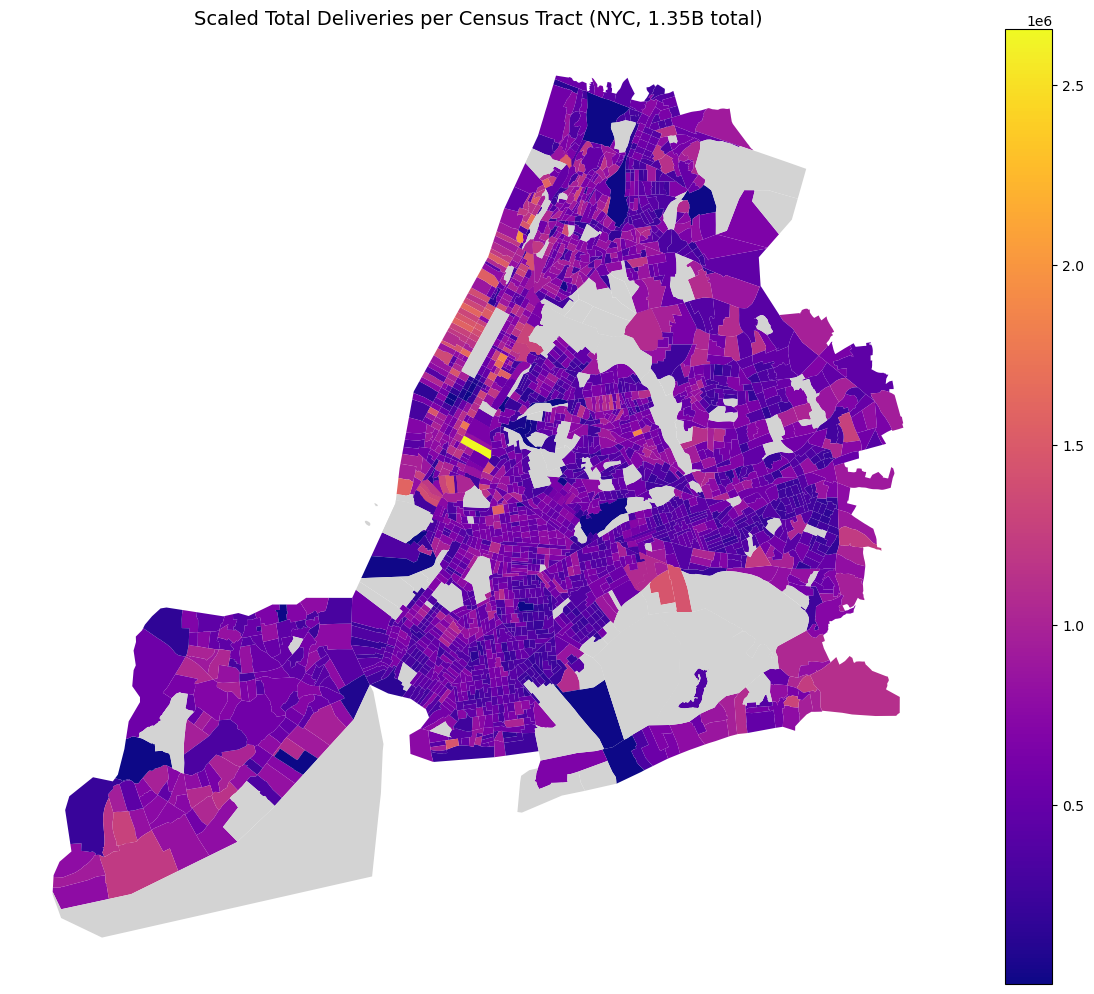

In [250]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# STEP 1: Load shapefiles
tracts = gpd.read_file("nyc_census/tl_2023_36_tract.shp")
boroughs = gpd.read_file("nyc_boroughs.geojson")

# Ensure CRS match for spatial join
tracts = tracts.to_crs(boroughs.crs)

# STEP 2: Spatial filter — keep only NYC tracts
tracts_nyc = gpd.sjoin(tracts, boroughs, how="inner", predicate="intersects")

# Rebuild GEOID
tracts_nyc['geoid'] = tracts_nyc['STATEFP'] + tracts_nyc['COUNTYFP'] + tracts_nyc['TRACTCE']

# STEP 3: Merge with delivery predictions
tracts_nyc = tracts_nyc.merge(
    tract_df[['geoid', 'expected_del_freq', 'B01001_001E']],
    on='geoid',
    how='left'
)

# STEP 4: Compute raw tract-level totals
tracts_nyc['raw_total_deliveries'] = tracts_nyc['expected_del_freq'] * tracts_nyc['B01001_001E']

# STEP 5: Scale so total equals 1,350,500,000
total_raw = tracts_nyc['raw_total_deliveries'].sum()
scaling_factor = 1_350_500_000 / total_raw
tracts_nyc['scaled_total_deliveries'] = tracts_nyc['raw_total_deliveries'] * scaling_factor

# STEP 6: Plot
tracts_nyc.to_crs(epsg=3857).plot(
    column='scaled_total_deliveries',
    cmap='plasma',
    legend=True,
    figsize=(12, 10),
    edgecolor='none',
    missing_kwds={"color": "lightgrey", "label": "No data"}
)

plt.title("Scaled Total Deliveries per Census Tract (NYC, 1.35B total)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


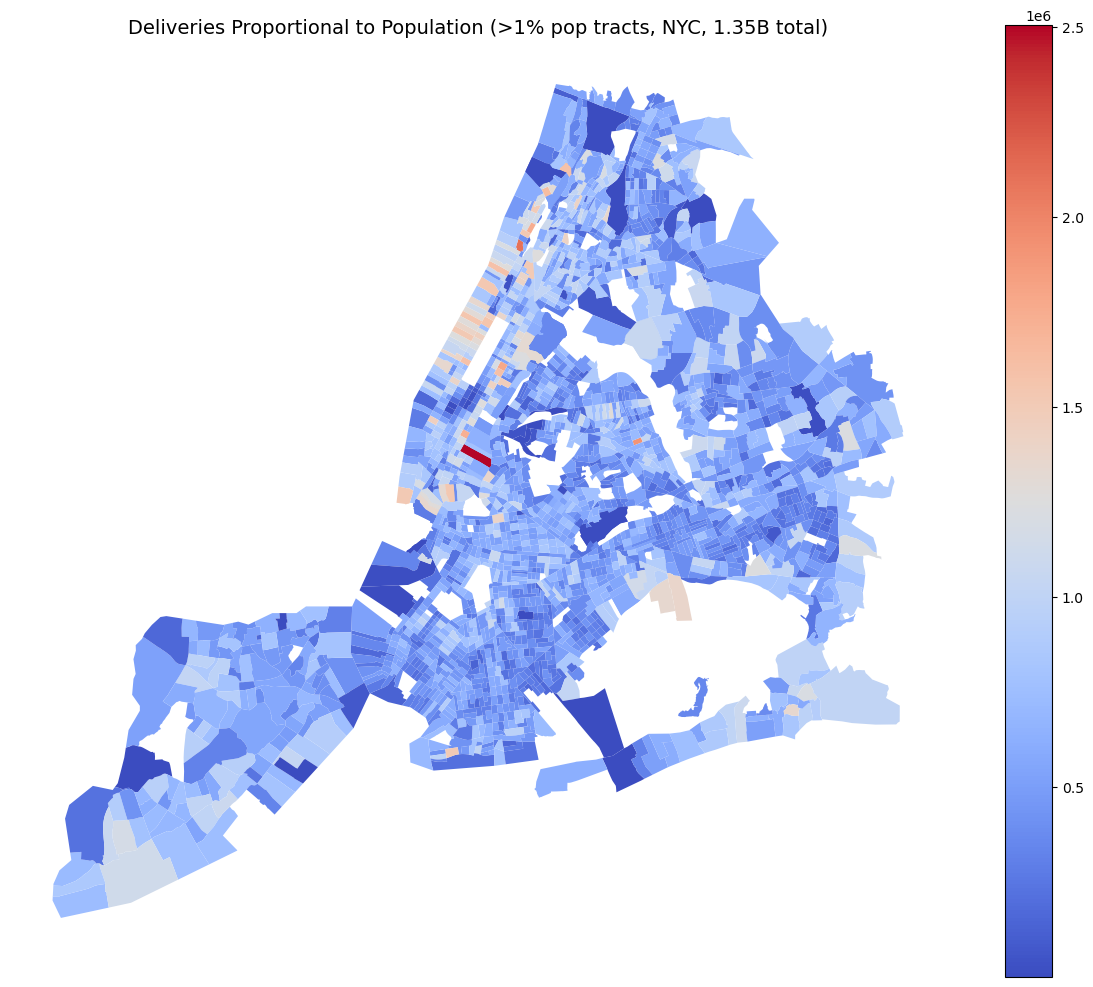

In [262]:
# STEP 1: Compute 1st percentile threshold
pop_threshold = tracts_nyc['B01001_001E'].quantile(0.005)

# STEP 2: Filter out low-population tracts
tracts_nyc_filtered = tracts_nyc[tracts_nyc['B01001_001E'] > pop_threshold].copy()

# STEP 3: Recalculate total population
total_pop_filtered = tracts_nyc_filtered['B01001_001E'].sum()

# STEP 4: Compute deliveries proportional to population
tracts_nyc_filtered['pop_scaled_deliveries'] = (
    tracts_nyc_filtered['B01001_001E'] / total_pop_filtered * 1_350_500_000
)

# STEP 5: Plot
tracts_nyc_filtered.to_crs(epsg=3857).plot(
    column='pop_scaled_deliveries',
    cmap='coolwarm',
    legend=True,
    figsize=(12, 10),
    edgecolor='none',
    missing_kwds={"color": "lightgrey", "label": "No data"}
)

plt.title("Deliveries Proportional to Population (>1% pop tracts, NYC, 1.35B total)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


In [257]:
tracts_nyc['B01001_001E'].describe()

count     2442.000000
mean      3683.158886
std       2065.772008
min          0.000000
25%       2281.000000
50%       3444.500000
75%       4822.750000
max      16684.000000
Name: B01001_001E, dtype: float64

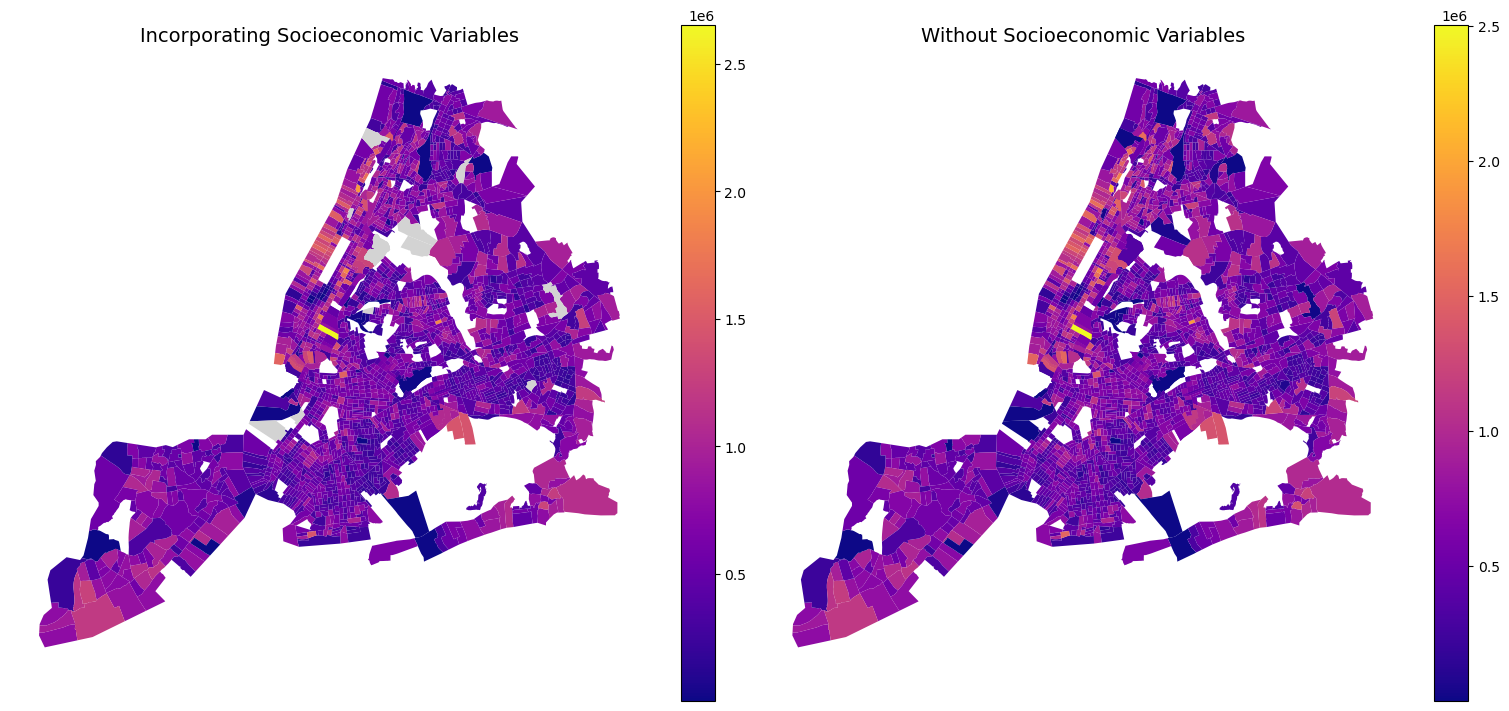

In [276]:
# Set CRS for plotting
plot_gdf = tracts_nyc_filtered.to_crs(epsg=3857)

fig, axes = plt.subplots(1, 2, figsize=(15, 7), constrained_layout=True)

# Map 1: Model-based deliveries
plot_gdf.plot(
    column='scaled_total_deliveries',
    cmap='plasma',
    legend=True,
    ax=axes[0],
    edgecolor='none',
    missing_kwds={"color": "lightgrey", "label": "No data"}
)
axes[0].set_title("Incorporating Socioeconomic Variables", fontsize=14)
axes[0].axis('off')

# Map 2: Population proportional deliveries
plot_gdf.plot(
    column='pop_scaled_deliveries',
    cmap='plasma',
    legend=True,
    ax=axes[1],
    edgecolor='none',
    missing_kwds={"color": "lightgrey", "label": "No data"}
)
axes[1].set_title("Without Socioeconomic Variables", fontsize=14)
axes[1].axis('off')

plt.show()

In [266]:
import numpy as np

x = tracts_nyc_filtered['scaled_total_deliveries']
y = tracts_nyc_filtered['pop_scaled_deliveries']

# Boolean mask for finite, non-null values in both arrays
mask = (~x.isna()) & (~y.isna()) & np.isfinite(x) & np.isfinite(y)

x_clean = x[mask]
y_clean = y[mask]

print(f"Valid data points: {len(x_clean)}")


Valid data points: 2333


In [267]:
from scipy.stats import pearsonr, spearmanr

pearson_corr, pearson_p = pearsonr(x_clean, y_clean)
spearman_corr, spearman_p = spearmanr(x_clean, y_clean)

print(f"Pearson r = {pearson_corr:.3f} (p={pearson_p:.3g})")
print(f"Spearman rho = {spearman_corr:.3f} (p={spearman_p:.3g})")


Pearson r = 0.996 (p=0)
Spearman rho = 0.997 (p=0)


In [270]:
plot_gdf.to_file("./nyc_census/output/demand_distribution_census.shp")

/var/folders/n6/07flntc946j046ynznszq86w0000gn/T/ipykernel_70762/2804712805.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  plot_gdf.to_file("./nyc_census/output/demand_distribution_census.shp")
/opt/anaconda3/envs/ox/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'index_right' to 'index_righ'
  ogr_write(
/opt/anaconda3/envs/ox/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'geoid' to 'geoid_1'
  ogr_write(
/opt/anaconda3/envs/ox/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'expected_del_freq' to 'expected_d'
  ogr_write(
/opt/anaconda3/envs/ox/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'B01001_001E' to 'B01001_001'
  ogr_write(
/opt/anaconda3/envs/ox/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Norm

In [274]:
from libpysal.weights import KNN
from esda.moran import Moran_BV

# Drop rows with missing values in the columns of interest
plot_gdf_clean = plot_gdf.dropna(subset=['scaled_total_deliveries', 'pop_scaled_deliveries'])

# Create K-Nearest Neighbors spatial weights with k=5
w = KNN.from_dataframe(plot_gdf_clean, k=5)
w.transform = 'r'  # row-standardize

# Compute Bivariate Moran's I
moran_bv = Moran_BV(plot_gdf_clean['scaled_total_deliveries'], 
                   plot_gdf_clean['pop_scaled_deliveries'], w)

print("Bivariate Moran's I:", moran_bv.I)
print("p-value:", moran_bv.p_sim)


Bivariate Moran's I: 0.35364130766348706
p-value: 0.001
